In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization library

In [32]:
import pandas as pd

df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [33]:
df.shape

(14640, 15)

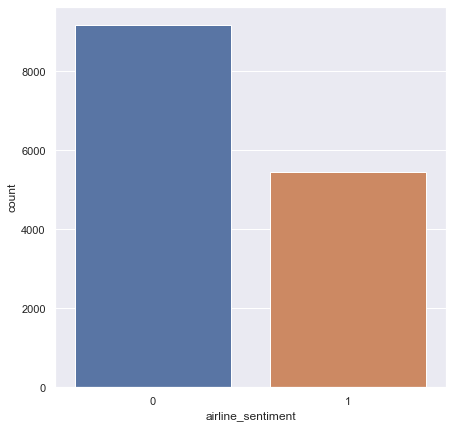

In [66]:
sns.set_theme(style="darkgrid")
sns.countplot(x='airline_sentiment' ,data=df)
sns.set(rc={'figure.figsize':(7,7)})

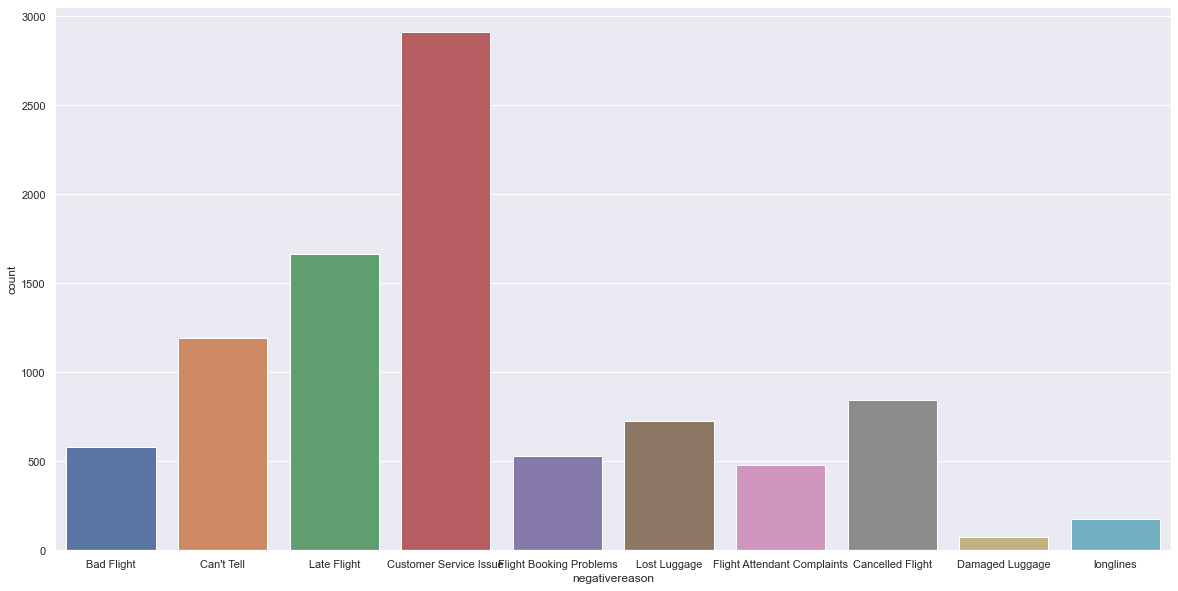

In [68]:
sns.set_theme(style="darkgrid")
sns.countplot(x='negativereason' ,data=df)
sns.set(rc={'figure.figsize':(20,10)})

Our main Objective is to clean the data

For that we need text and sentiment column of our dataframe

In [34]:
import re

df.text=df.text.apply(lambda x : x.lower())
df.text = df.text.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df.text.head()


0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

Mapping our Sentiments 

In [35]:

df.airline_sentiment=df.airline_sentiment.map({'neutral' : 1, 'positive':1,'negative':0})
df.airline_sentiment[0:10]


0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: airline_sentiment, dtype: int64

In [36]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [37]:
y = df["airline_sentiment"]
x = df["text"]

In [38]:
print(x.shape,y.shape)

(14640,) (14640,)


### Importing test, train and split from sklearn library

We will train 80%  of our data and reamining 20% will be tested.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the total set: 14640
Number of rows in the training set: 10980
Number of rows in the test set: 3660


### Extracting Features Using Count Vectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
vectorizer = CountVectorizer()

# Fit the training data and then return the matrix
train_vectors = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
test_vectors = count_vector.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(10980, 14029) (3660, 14029)


In [45]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# naive_bayes = MultinomialNB()
# naive_bayes.fit(training_data, y_train)
# nb_pred = naive_bayes.predict(testing_data)

# nb_acc = accuracy_score(y_test,nb_pred)*100
# nb_prec= precision_score(y_test,nb_pred)*100
# nb_rec= recall_score(y_test,nb_pred)*100
# nb_f1= f1_score(y_test,nb_pred)*100
# print(nb_acc)
# print(nb_prec)
# print(nb_rec)
# print(nb_f1)

### Multinomial Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(train_vectors, Y_train)

In [47]:
from  sklearn.metrics  import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nb_pred = nb.predict(test_vectors)
nb_acc = accuracy_score(Y_test,nb_pred)*100
nb_prec= precision_score(Y_test,nb_pred)*100
nb_rec= recall_score(Y_test,nb_pred)*100
nb_f1= f1_score(Y_test,nb_pred)*100
nb_acc

81.85792349726776

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_vectors,Y_train)
rf_pred = rf.predict(test_vectors)

rf_acc = accuracy_score(Y_test,rf_pred)*100
rf_prec= precision_score(Y_test,rf_pred)*100
rf_rec= recall_score(Y_test,rf_pred)*100
rf_f1= f1_score(Y_test,rf_pred)*100


In [49]:
rf_acc

82.43169398907104

### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(train_vectors,Y_train)
dt_pred = dt.predict(test_vectors)
dt_acc = accuracy_score(Y_test,dt_pred)*100
dt_prec= precision_score(Y_test,dt_pred)*100
dt_rec= recall_score(Y_test,dt_pred)*100
dt_f1= f1_score(Y_test,dt_pred)*100
dt_acc

76.0382513661202

### Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_vectors,Y_train)
gb_pred = gb.predict(test_vectors)
gb_acc = accuracy_score(Y_test,gb_pred)*100
gb_prec= precision_score(Y_test,gb_pred)*100
gb_rec= recall_score(Y_test,gb_pred)*100
gb_f1= f1_score(Y_test,gb_pred)*100
gb_acc

78.55191256830601

### Logistic Regression Classifier

In [52]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_vectors, Y_train)
log_pred = log.predict(test_vectors)

log_acc = accuracy_score(Y_test,log_pred)*100
log_prec= precision_score(Y_test,log_pred)*100
log_rec= recall_score(Y_test,log_pred)*100
log_f1= f1_score(Y_test,log_pred)*100
log_acc

C:\Users\rites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


84.15300546448088

###  Scoring and Metrics

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

 `Accuracy`  measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

` Precision` tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

`Recall(sensitivity)` tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy.                  

`F1 score` is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best  possible F1 score.

F1 Score = 2*[(precision*recall) / (precision+recall)]

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.



### NAIVE BAYES METRIC SCORE

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, nb_pred)))
print('Precision score: ', format(precision_score(Y_test, nb_pred)))
print('Recall score: ', format(recall_score(Y_test, nb_pred)))
print('F1 score: ', format(f1_score(Y_test, nb_pred)))

Accuracy score:  0.8185792349726776
Precision score:  0.8637770897832817
Recall score:  0.6113951789627465
F1 score:  0.7159965782720273


### RANDOM FOREST METRIC SCORE

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, rf_pred)))
print('Precision score: ', format(precision_score(Y_test, rf_pred)))
print('Recall score: ', format(recall_score(Y_test, rf_pred)))
print('F1 score: ', format(f1_score(Y_test, rf_pred)))

Accuracy score:  0.8243169398907104
Precision score:  0.851063829787234
Recall score:  0.6428049671292915
F1 score:  0.7324178110694964


### LOGISTIC REGRESSION METRIC SCORE

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, log_pred)))
print('Precision score: ', format(precision_score(Y_test, log_pred)))
print('Recall score: ', format(recall_score(Y_test, log_pred)))
print('F1 score: ', format(f1_score(Y_test, log_pred)))

Accuracy score:  0.8415300546448088
Precision score:  0.7933085501858737
Recall score:  0.7794010226442659
F1 score:  0.7862932940309506


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, gb_pred)))
print('Precision score: ', format(precision_score(Y_test, gb_pred)))
print('Recall score: ', format(recall_score(Y_test, gb_pred)))
print('F1 score: ', format(f1_score(Y_test, gb_pred)))

Accuracy score:  0.7855191256830601
Precision score:  0.8139784946236559
Recall score:  0.5529583637691746
F1 score:  0.6585471944323619


### Comparing Metric Scores

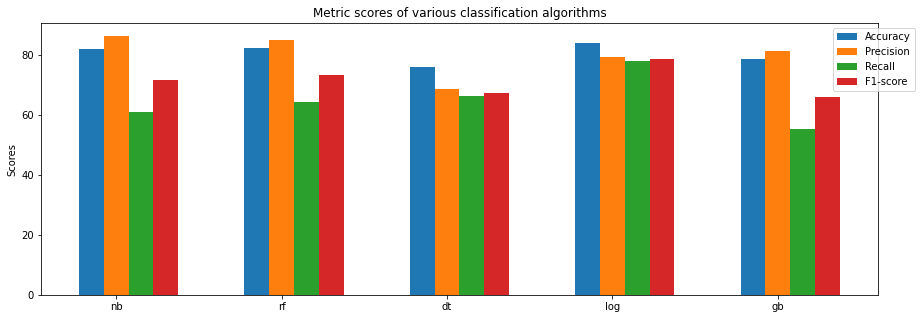

In [58]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['nb','rf','dt','log','gb']
accuracy=[nb_acc,rf_acc,dt_acc,log_acc,gb_acc]
precision=[nb_prec,rf_prec,dt_prec,log_prec,gb_prec]
recall=[nb_rec,rf_rec,dt_rec,log_rec,gb_rec]
f1_score=[nb_f1,rf_f1,dt_f1,log_f1,gb_f1]

width = 0.3  
r1 = np.arange(0,len(labels)*2,2) 
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]


rects1 = plt.bar(r1, accuracy, width, label='Accuracy')
rects2 = plt.bar(r2, precision, width, label='Precision')
rects3 = plt.bar(r3, recall, width, label='Recall')
rects4 = plt.bar(r4, f1_score, width, label='F1-score')
plt.rcParams["figure.figsize"] = (15,5)

plt.ylabel('Scores')
plt.title('Metric scores of various classification algorithms')
plt.xticks([r + width for r in range(0,len(labels)*2,2)], ['nb','rf','dt','log','gb'])
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.show()


Here we can the see how well various Machine Learning Classifier performs on our dataset, their scores tells us that the overall performance of 'Logistic Regression' performs better on the given set.

Here we can the see how well various Machine Learning Classifier performs on our dataset, their scores tells us that the overall performance of 'Logistic Regression' performs better on the given set.

In [59]:
msg = 'You have been specially selected for 4-day holiday.speak to our live operator and claim'
data = [msg]
vect = count_vector.transform(data).toarray()
x = naive_bayes.predict(vect)
x

array([0], dtype=int64)

A Negative Message is claimed to be a 'Negative' message